## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

In [92]:
mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results_df.head()
print(len(study_results_df))

1893


In [4]:
combined_data_df=pd.merge(study_results_df,mouse_metadata_df, on=["Mouse ID"], how='inner')

In [5]:
# Display the data table for preview
combined_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
#show rows and columns of new Dataframe
combined_data_df.shape

(1893, 8)

In [7]:
# Checking the number of mice.
#Option #1

# variable to hold the count 
cnt = 0
  
# list to hold visited values 
visited = [] 
  
# loop for counting the unique 
# values in height 
for i in range(0, len(combined_data_df['Mouse ID'])): 
    
    if combined_data_df['Mouse ID'][i] not in visited:  
        
        visited.append(combined_data_df['Mouse ID'][i]) 
          
        cnt += 1
  
print("No.of.unique values :", 
      cnt) 


No.of.unique values : 249


In [85]:
# Checking the number of mice.
#Option #2

n = len(pd.unique(combined_data_df['Mouse ID'])) 
  
print("No.of.unique values :",  
      n)

No.of.unique values : 249


In [86]:
# Checking the number of mice.
#Option #3

# getting the list of unique values 
li = list(combined_data_df['Mouse ID'].value_counts()) 
  
# print the unique value counts 
print("No.of.unique values :", 
     len(li))

No.of.unique values : 249


In [8]:
combined_data_df.isna().mean()

Mouse ID              0.0
Timepoint             0.0
Tumor Volume (mm3)    0.0
Metastatic Sites      0.0
Drug Regimen          0.0
Sex                   0.0
Age_months            0.0
Weight (g)            0.0
dtype: float64

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows_df = combined_data_df[combined_data_df.duplicated(['Mouse ID', 'Timepoint'])]
print("Duplicate Rows based on 2 columns are:", duplicate_rows_df, sep='\n')

Duplicate Rows based on 2 columns are:
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
861     g989          0           45.000000                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
867     g989         15           53.442020                 0     Propriva   
869     g989         20           54.657650                 1     Propriva   

        Sex  Age_months  Weight (g)  
861  Female          21          26  
863  Female          21          26  
865  Female          21          26  
867  Female          21          26  
869  Female          21          26  


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
data_for_dup_mouse_df=combined_data_df.loc[combined_data_df['Mouse ID'].isin(duplicate_rows_df['Mouse ID'])]
data_for_dup_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
print(len(combined_data_df))
combined_data_df.drop(combined_data_df[combined_data_df['Mouse ID']=='g989'].index,inplace=True)
print(len(combined_data_df))

1893
1880


In [13]:
# Checking the number of mice in the clean DataFrame.
n = len(pd.unique(combined_data_df['Mouse ID'])) 
  
print("No.of.unique values :", n)

No.of.unique values : 248


## Summary Statistics

In [101]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_vol_s=combined_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mean_tumor_vol_s

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [102]:
median_tumor_vol_s=combined_data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
median_tumor_vol_s

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [103]:
variance_tumor_vol_s=combined_data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
variance_tumor_vol_s

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [104]:
import numpy as np
std_tumor_vol_s=combined_data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
std_tumor_vol_s

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [105]:
sem_tumor_vol_s=combined_data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
sem_tumor_vol_s

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [181]:
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean":mean_tumor_vol_s,"Median":median_tumor_vol_s, "Variance":variance_tumor_vol_s, "STD":std_tumor_vol_s,"SEM":sem_tumor_vol_s})
summary_df

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [22]:
mouse_count_by_reg_s=combined_data_df.groupby(['Drug Regimen']).size()
mouse_count_by_reg_s

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
dtype: int64

In [24]:
mouse_count_by_reg_df = pd.DataFrame()
mouse_count_by_reg_df["Drug Regimen"]=mouse_count_by_reg_s.index
mouse_count_by_reg_df["Mouse Count"]=mouse_count_by_reg_s.values
mouse_count_by_reg_df

,Drug Regimen,Mouse Count
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


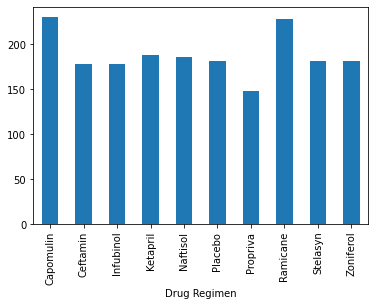

In [32]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouse_count_by_reg_s.plot.bar(x=mouse_count_by_reg_s.index,y=mouse_count_by_reg_s.values,rot=0)
mouse_count_by_reg_s.plot.bar(stacked=True)

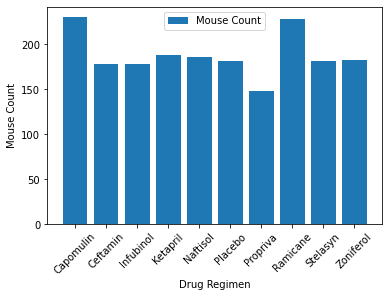

In [152]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis=np.arange(len(mouse_count_by_reg_s))
plt.bar(x_axis, mouse_count_by_reg_s,align='center', label="Mouse Count")
plt.xlabel('Drug Regimen')
plt.ylabel('Mouse Count')
regimens=mouse_count_by_reg_s.index
plt.xlim=(-0.75,len(x_axis)-.25)
plt.ylim=(0,max(mouse_count_by_reg_s)* 1.15)
plt.xticks([value for value in x_axis], regimens, rotation=45)
plt.legend(loc='best')
plt.show()

In [36]:
mouse_count_by_gender_s=combined_data_df.groupby(['Sex']).size()
mouse_count_by_gender_s

Sex
Female    922
Male      958
dtype: int64

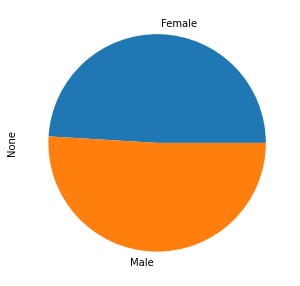

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_count_by_gender_s.plot.pie(y='mass', figsize=(5, 5))

([<matplotlib.patches.Wedge at 0x24241f634f0>,
 [Text(-0.7320888280116858, -0.8210030133321538, 'Female'),
  Text(0.7320888280116862, 0.8210030133321533, 'Male')],
 [Text(-0.399321178915465, -0.447819825453902, '49.0%'),
  Text(0.39932117891546515, 0.4478198254539018, '51.0%')])

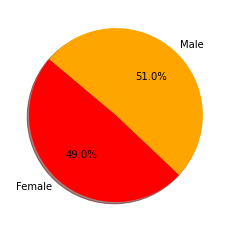

In [151]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=mouse_count_by_gender_s.index
sizes=mouse_count_by_gender_s
#explode=(0.1,0,0,0)
colors=["red", "orange", "lightcoral", "lightskyblue"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [111]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_max_df=combined_data_df.groupby(['Mouse ID']).Timepoint.agg([max]).rename(columns={'max':'Timepoint'}).reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_max_df=pd.merge(timepoint_max_df, combined_data_df, how='left')
mouse_max_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
